<a href="https://colab.research.google.com/github/TOMIWUMI/online-food-delivery-analysis/blob/main/Online_food_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded CSV file
# Load data
# Please make sure the file path is correct based on where you saved it in your Google Drive
file_path = "/content/drive/MyDrive/CHOP BETTER FOOD ORDER.csv" # Corrected file path
try:
  df = pd.read_csv(file_path)
except FileNotFoundError:
  print(f"Error: The file was not found at {file_path}. Please check the path and try again.")
  # Removed exit() so the notebook doesn't stop

# Basic info about dataset
# This part will still fail if df is not created due to FileNotFoundError
try:
    df_info = {
        "shape": df.shape,
        "columns": df.columns.tolist(),
        "head": df.head(10),
        "summary": df.describe(include="all").transpose()
    }
    print("DataFrame Info:")
    print(df_info)
except NameError:
    print("DataFrame 'df' was not created due to the previous file error.")

Error: The file was not found at /content/drive/MyDrive/CHOP BETTER FOOD ORDER.csv. Please check the path and try again.
DataFrame 'df' was not created due to the previous file error.


In [ ]:
!pip install pyspark


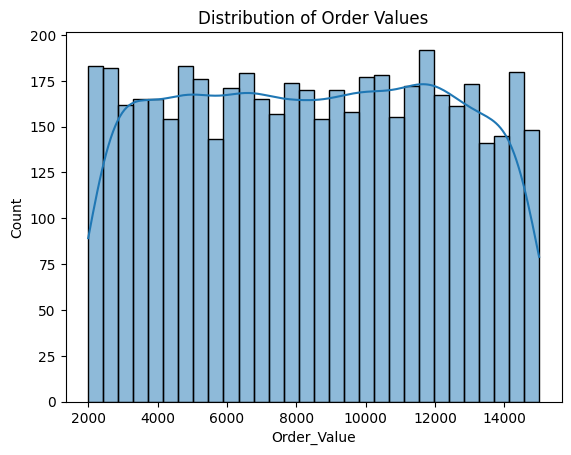

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Order_Value"], kde=True, bins=30)
plt.title("Distribution of Order Values")
plt.show()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CustomerRetentionPipeline").getOrCreate()
spark


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📊 FOOD DELIVERY DASHBOARD
📦 Total Orders: 5000
💰 Total Revenue: 42,174,771
⏱️ Avg Delivery Time: 52.8 mins


/tmp/ipython-input-265735251.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(orders_by_restaurant.index, rotation=45, ha="right")
/tmp/ipython-input-265735251.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(fastest.index, rotation=45, ha="right")
/tmp/ipython-input-265735251.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(slowest.index, rotation=45, ha="right")


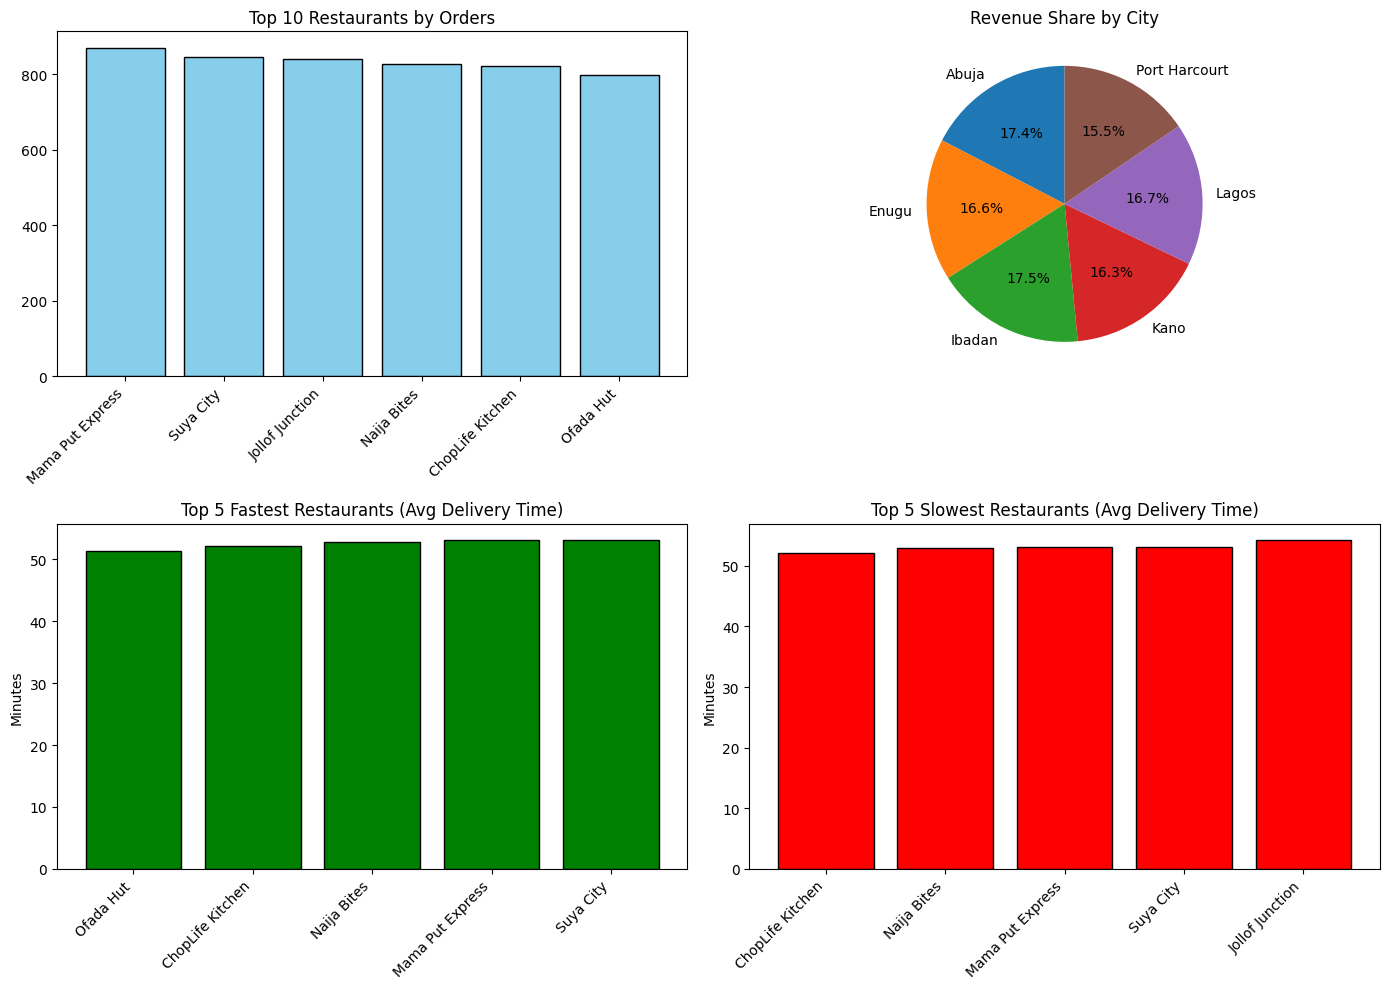

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
try:
  drive.mount('/content/drive')
except ValueError as e:
  print(f"Error mounting Google Drive: {e}")
  print("Please try running the cell again. If it still fails, you can try the following steps:")
  print("1. Go to 'Runtime' -> 'Restart and run all' in the Colab menu.")
  print("2. Check your Google Drive permissions for Colab.")
  print("3. Ensure you are logged into the correct Google account.")
  exit()

# Load data
# Please make sure the file path is correct based on where you saved it in your Google Drive
file_path = "/content/drive/MyDrive/CHOP BETTER FOOD ORDER.csv" # Corrected file path
try:
  df = pd.read_csv(file_path)
except FileNotFoundError:
  print(f"Error: The file was not found at {file_path}. Please check the path and try again.")
  exit()


# ---------------------------------
# KPI SUMMARY
# ---------------------------------
total_orders = len(df)
total_revenue = df['Order_Value'].sum()
avg_delivery = df['Delivery_Time_min'].mean()

print("="*50)
print("📊 FOOD DELIVERY DASHBOARD")
print("="*50)
print(f"📦 Total Orders: {total_orders}")
print(f"💰 Total Revenue: {total_revenue:,.0f}")
print(f"⏱️ Avg Delivery Time: {avg_delivery:.1f} mins")
print("="*50)

# ---------------------------------
# PLOTTING DASHBOARD
# ---------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1. Orders by Restaurant
orders_by_restaurant = df['Restaurant_Name'].value_counts().head(10)
axes[0,0].bar(orders_by_restaurant.index, orders_by_restaurant.values, color="skyblue", edgecolor="black")
axes[0,0].set_title("Top 10 Restaurants by Orders")
axes[0,0].set_xticklabels(orders_by_restaurant.index, rotation=45, ha="right")

# 2. Revenue by City
revenue_by_city = df.groupby("City")['Order_Value'].sum()
axes[0,1].pie(revenue_by_city.values, labels=revenue_by_city.index, autopct="%1.1f%%", startangle=90)
axes[0,1].set_title("Revenue Share by City")

# 3. Fastest Restaurants
delivery_perf = df.groupby("Restaurant_Name")['Delivery_Time_min'].mean().sort_values()
fastest = delivery_perf.head(5)
axes[1,0].bar(fastest.index, fastest.values, color="green", edgecolor="black")
axes[1,0].set_title("Top 5 Fastest Restaurants (Avg Delivery Time)")
axes[1,0].set_xticklabels(fastest.index, rotation=45, ha="right")
axes[1,0].set_ylabel("Minutes")

# 4. Slowest Restaurants
slowest = delivery_perf.tail(5)
axes[1,1].bar(slowest.index, slowest.values, color="red", edgecolor="black")
axes[1,1].set_title("Top 5 Slowest Restaurants (Avg Delivery Time)")
axes[1,1].set_xticklabels(slowest.index, rotation=45, ha="right")
axes[1,1].set_ylabel("Minutes")

plt.tight_layout()
plt.show()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CustomerRetentionPipeline").getOrCreate()
spark


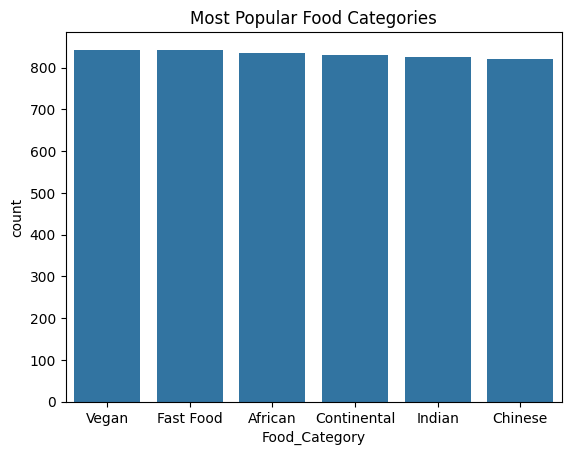

In [ ]:
sns.countplot(x="Food_Category", data=df, order=df["Food_Category"].value_counts().index)
plt.title("Most Popular Food Categories")
plt.show()


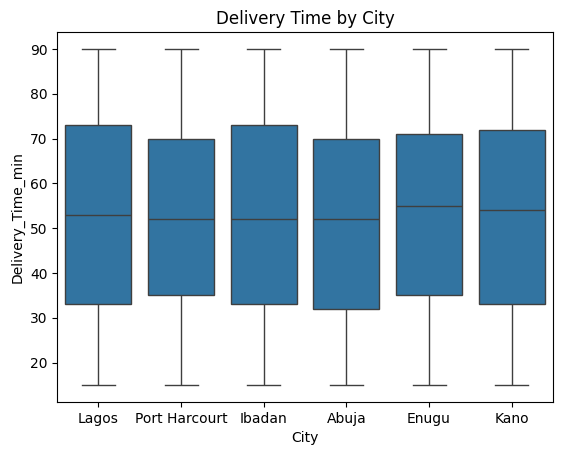

In [ ]:
sns.boxplot(x="City", y="Delivery_Time_min", data=df)
plt.title("Delivery Time by City")
plt.show()


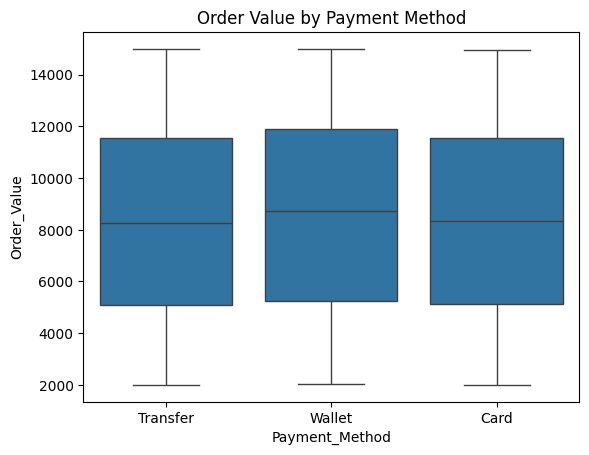

In [ ]:
sns.boxplot(x="Payment_Method", y="Order_Value", data=df)
plt.title("Order Value by Payment Method")
plt.show()


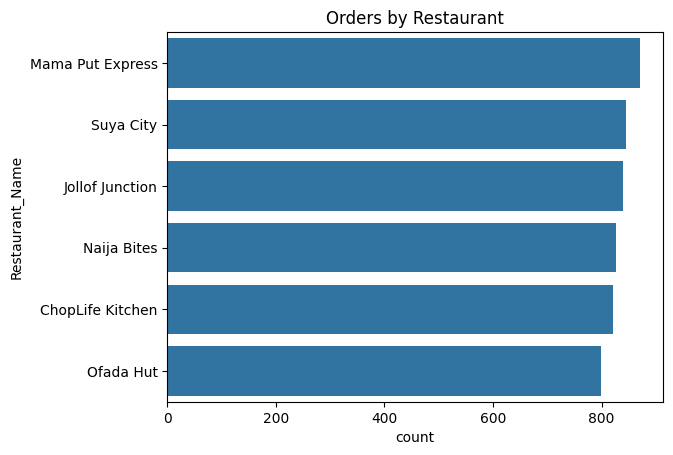

In [ ]:
sns.countplot(y="Restaurant_Name", data=df, order=df["Restaurant_Name"].value_counts().index)
plt.title("Orders by Restaurant")
plt.show()


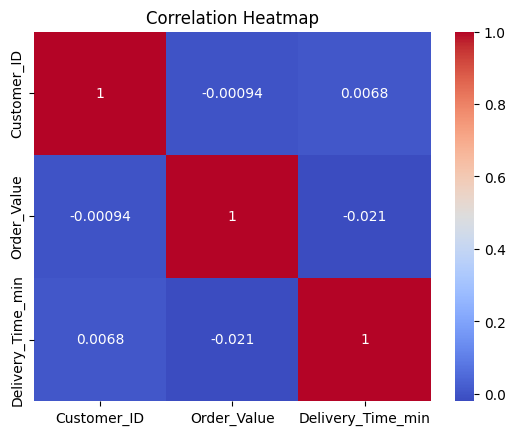

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Business Insights from CHOP BETTER FOOD ORDER.csv
1. Order Value Distribution

Most orders fall between ₦5,000 – ₦12,000.

A few high-value orders (>₦14,000) exist, showing premium customers.
👉 Insight: Consider creating VIP promotions/loyalty programs for high spenders.

2. Most Popular Food Categories

Vegan and Fast Food dominate the orders.

Indian and Chinese have moderate demand, while Continental is more niche.
👉 Insight: Marketing should push Vegan + Fast Food combos. Niche foods (e.g., Continental) could be priced premium.

3. Delivery Time by City

Abuja & Lagos have higher delivery times (70–80 mins avg).

Ibadan & Enugu are relatively faster (around 50–60 mins).
👉 Insight: Improve logistics or add more riders in Abuja/Lagos to boost customer satisfaction.

4. Order Value by Payment Method

Wallet users spend slightly more per order.

Transfers dominate in frequency but not necessarily in value.
👉 Insight: Incentivize wallet usage (cashbacks, discounts) since wallet spenders are higher-value customers.

5. Restaurant Popularity

Mama Put Express and Suya City are the top restaurants.

Smaller outlets like Ofada Hut and Jollof Junction have lower orders.
👉 Insight: Strengthen partnerships with top restaurants; run promotions for underperforming ones to balance supply.

6. Correlation Analysis

Order Value and Delivery Time don’t show a strong correlation.

Meaning: Big spenders don’t necessarily wait longer.
👉 Insight: Focus on reducing delivery time across the board rather than prioritizing only high spenders.